# <center>  <font color='violet'> Risque Financier pour l'Approbation de Prêts</font>
</center>


## Le context de projet <br>
**Les projets d'évaluation du risque financier pour l'approbation de prêts sont essentiels pour les institutions financières, car ils permettent de prédire la capacité d'un emprunteur à rembourser un prêt, réduisant ainsi le risque de défaut. En utilisant des modèles de machine learning, ces projets aident à prendre des décisions plus précises, basées sur des données telles que l'historique de crédit, les revenus et d'autres facteurs économiques. Cela permet aux banques de minimiser les pertes financières, d'optimiser leurs profits, et de respecter les régulations tout en offrant des conditions de prêt adaptées au profil de risque de chaque emprunteur.**

## Description de jeu de données

# Description des Variables pour l'Évaluation d'un Prêt

- **ApplicationDate** : Date à laquelle la demande de prêt a été soumise.
- **Age** : Âge de la personne qui fait la demande de prêt.
- **AnnualIncome** : Revenu annuel de l'emprunteur.
- **CreditScore** : Score qui mesure la solvabilité de l'emprunteur (sa capacité à rembourser).
- **EmploymentStatus** : Situation professionnelle de l'emprunteur (ex. salarié, chômeur, indépendant).
- **EducationLevel** : Dernier diplôme ou niveau d'étude atteint par l'emprunteur.
- **Experience** : Nombre d'années d'expérience professionnelle.
- **LoanAmount** : Montant du prêt demandé.
- **LoanDuration** : Durée sur laquelle l'emprunteur souhaite rembourser le prêt.
- **MaritalStatus** : Situation matrimoniale de l'emprunteur (célibataire, marié, etc.).
- **NumberOfDependents** : Nombre de personnes à charge de l'emprunteur.
- **HomeOwnershipStatus** : Type de logement (propriétaire, locataire, etc.).
- **MonthlyDebtPayments** : Montant total des paiements de dettes mensuelles de l'emprunteur.
- **CreditCardUtilizationRate** : Pourcentage d'utilisation du crédit sur la carte de crédit de l'emprunteur.
- **NumberOfOpenCreditLines** : Nombre de lignes de crédit actives de l'emprunteur.
- **NumberOfCreditInquiries** : Nombre de fois que l'emprunteur a demandé un crédit ou a eu un contrôle de crédit.
- **DebtToIncomeRatio** : Rapport entre la dette de l'emprunteur et ses revenus.
- **BankruptcyHistory** : Historique de faillite de l'emprunteur.
- **LoanPurpose** : Motif du prêt (achat immobilier, voiture, études, etc.).
- **PreviousLoanDefaults** : Nombre de prêts précédents non remboursés par l'emprunteur.
- **PaymentHistory** : Historique des paiements passés (ont-ils payé à temps ?).
- **LengthOfCreditHistory** : Durée pendant laquelle l'emprunteur a eu un historique de crédit.
- **SavingsAccountBalance** : Montant dans le compte d'épargne de l'emprunteur.
- **CheckingAccountBalance** : Montant dans le compte courant de l'emprunteur.
- **TotalAssets** : Valeur totale des biens possédés par l'emprunteur.
- **TotalLiabilities** : Total des dettes de l'emprunteur.
- **MonthlyIncome** : Revenu mensuel de l'emprunteur.
- **UtilityBillsPaymentHistory** : Historique des paiements des factures (électricité, eau, etc.).
- **JobTenure** : Durée pendant laquelle l'emprunteur travaille dans son emploi actuel.
- **NetWorth** : Valeur nette de l'emprunteur (différence entre les actifs et les dettes).
- **BaseInterestRate** : Taux d'intérêt de base appliqué au prêt.
- **InterestRate** : Taux d'intérêt réel appliqué au prêt de l'emprunteur.
- **MonthlyLoanPayment** : Montant à payer chaque mois pour le prêt.
- **TotalDebtToIncomeRatio** : Rapport total entre les dettes et les revenus de l'emprunteur.
- **LoanApproved** : Statut de l'approbation du prêt (approuvé ou refusé).

##  Notre but et de determiner Le RiskScore (score de risque)  qui est une mesure utilisée pour évaluer le niveau de risque associé à une demande de prêt. Il reflète la probabilité qu'un emprunteur ne puisse pas rembourser son prêt.  

In [1]:
# lecture de données
data=read.csv('/kaggle/input/financial-risk-for-loan-approval/Loan.csv')

In [2]:
# affichage de premières lignes
head(data,3)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,⋯,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,⋯,3329.000,0.7249720,11,126928,0.199652,0.2275896,419.8060,0.1810772,0,49
2,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,⋯,3309.083,0.9351321,3,43609,0.207045,0.2010771,794.0542,0.3898524,0,52
3,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,⋯,3393.667,0.8722406,6,5205,0.217627,0.2125480,666.4067,0.4621570,0,52


### Nettoyage de données

In [3]:
# Vérifier les valeurs manquantes dans chaque colonne
result = sapply(data, function(x) sum(is.na(x)))
print(result)

           ApplicationDate                        Age 
                         0                          0 
              AnnualIncome                CreditScore 
                         0                          0 
          EmploymentStatus             EducationLevel 
                         0                          0 
                Experience                 LoanAmount 
                         0                          0 
              LoanDuration              MaritalStatus 
                         0                          0 
        NumberOfDependents        HomeOwnershipStatus 
                         0                          0 
       MonthlyDebtPayments  CreditCardUtilizationRate 
                         0                          0 
   NumberOfOpenCreditLines    NumberOfCreditInquiries 
                         0                          0 
         DebtToIncomeRatio          BankruptcyHistory 
                         0                          0 
          

In [4]:
# verification des duplications
sum(duplicated(data))

[1] 0


### Comme nous allons travailler avec RandomForest et XGBoost  qui sont robustes en gestion  des valeurs  aberrantes,nous les negligeons alors .

In [5]:
# verification ds types de chaque variable
for (col in colnames(data)){
    print(paste(col," est ",class(data[[col]])))
}

[1] "ApplicationDate  est  character"
[1] "Age  est  integer"
[1] "AnnualIncome  est  integer"
[1] "CreditScore  est  integer"
[1] "EmploymentStatus  est  character"
[1] "EducationLevel  est  character"
[1] "Experience  est  integer"
[1] "LoanAmount  est  integer"
[1] "LoanDuration  est  integer"
[1] "MaritalStatus  est  character"
[1] "NumberOfDependents  est  integer"
[1] "HomeOwnershipStatus  est  character"
[1] "MonthlyDebtPayments  est  integer"
[1] "CreditCardUtilizationRate  est  numeric"
[1] "NumberOfOpenCreditLines  est  integer"
[1] "NumberOfCreditInquiries  est  integer"
[1] "DebtToIncomeRatio  est  numeric"
[1] "BankruptcyHistory  est  integer"
[1] "LoanPurpose  est  character"
[1] "PreviousLoanDefaults  est  integer"
[1] "PaymentHistory  est  integer"
[1] "LengthOfCreditHistory  est  integer"
[1] "SavingsAccountBalance  est  integer"
[1] "CheckingAccountBalance  est  integer"
[1] "TotalAssets  est  integer"
[1] "TotalLiabilities  est  integer"
[1] "MonthlyIncome  est  nume

### Analyse de données

In [6]:
# resumé statistique
summary(data)



 ApplicationDate         Age         AnnualIncome     CreditScore   
 Length:20000       Min.   :18.00   Min.   : 15000   Min.   :343.0  
 Class :character   1st Qu.:32.00   1st Qu.: 31679   1st Qu.:540.0  
 Mode  :character   Median :40.00   Median : 48566   Median :578.0  
                    Mean   :39.75   Mean   : 59162   Mean   :571.6  
                    3rd Qu.:48.00   3rd Qu.: 74391   3rd Qu.:609.0  
                    Max.   :80.00   Max.   :485341   Max.   :712.0  
 EmploymentStatus   EducationLevel       Experience      LoanAmount    
 Length:20000       Length:20000       Min.   : 0.00   Min.   :  3674  
 Class :character   Class :character   1st Qu.: 9.00   1st Qu.: 15575  
 Mode  :character   Mode  :character   Median :17.00   Median : 21914  
                                       Mean   :17.52   Mean   : 24883  
                                       3rd Qu.:25.00   3rd Qu.: 30835  
                                       Max.   :61.00   Max.   :184732  
  LoanDuratio

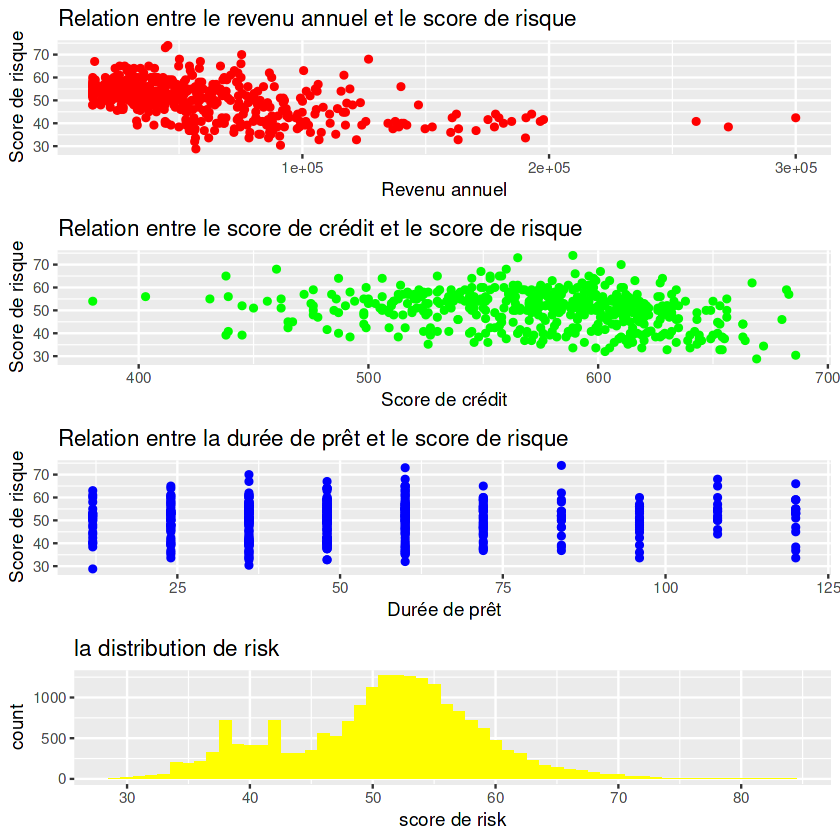

In [7]:
# Charger les bibliothèques nécessaires
library(ggplot2)
library(gridExtra)

# Créer les graphiques
plot1 <- ggplot(data[1:500,], aes(x = AnnualIncome, y = RiskScore)) +
  geom_point(color = 'red') +
  labs(
    title = "Relation entre le revenu annuel et le score de risque",
    x = "Revenu annuel",
    y = "Score de risque"
  )

plot2 <- ggplot(data[1:500,], aes(x = CreditScore, y = RiskScore)) +
  geom_point(color = 'green') +
  labs(
    title = "Relation entre le score de crédit et le score de risque",
    x = "Score de crédit",
    y = "Score de risque"
  ) 

plot3 <- ggplot(data[1:500,], aes(x = LoanDuration, y = RiskScore)) +
  geom_point(color = 'blue') +
  labs(
    title = "Relation entre la durée de prêt et le score de risque",
    x = "Durée de prêt",
    y = "Score de risque"
  ) 
plot4<- ggplot(data,aes(x=RiskScore))+geom_histogram(fill='yellow',binwidth=1) +labs(title='la distribution de risk ',x='score de risk') 

# Combiner les graphiques dans une grille
grid.arrange(plot1, plot2, plot3,plot4, ncol = 1) 


In [8]:
# Analyse de de répartition des demandes de prets selon la situation d'emploi
table(data$EmploymentStatus)


     Employed Self-Employed    Unemployed 
        17036          1573          1391 

In [9]:
# analyse de répartition des demandes de pres selon le niveau d'education
table(data$EducationLevel)


  Associate    Bachelor   Doctorate High School      Master 
       4034        6054         954        5908        3050 

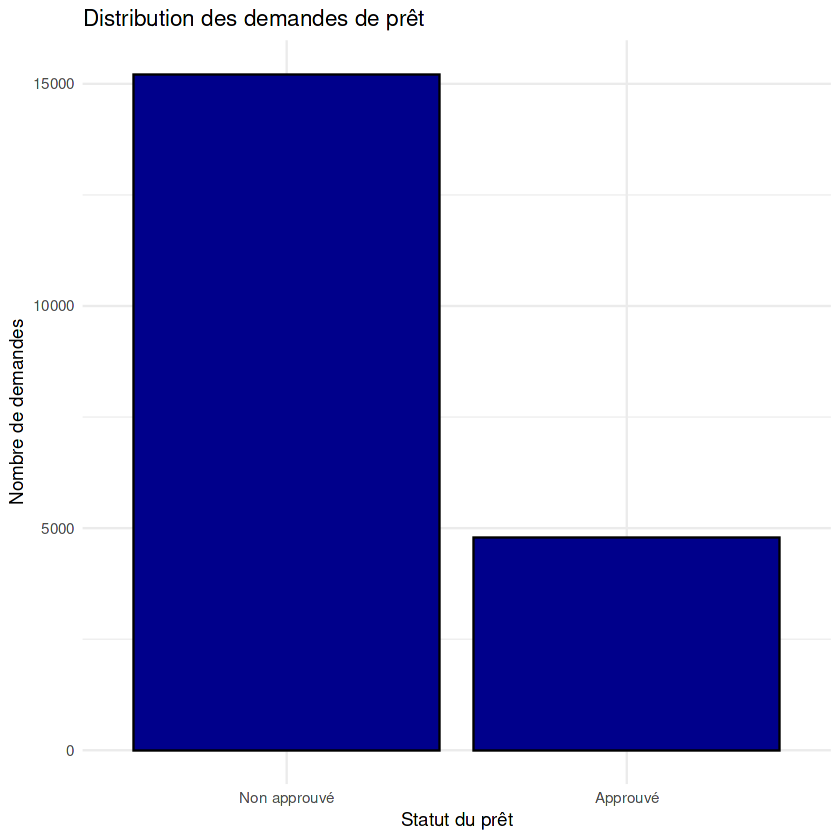

In [10]:
# est que la plupart des demandes acceptées?
ggplot(data, aes(x = factor(LoanApproved, levels = c(0, 1), labels = c("Non approuvé", "Approuvé")))) + 
  geom_bar(fill = 'darkblue', color = 'black') + 
  labs(title = 'Distribution des demandes de prêt', x = 'Statut du prêt', y = 'Nombre de demandes') +
  theme_minimal()


### Préparation de données

In [11]:
# Transformation de dates en  durée d'application par jours 
data$ApplicationDate=as.Date(data$ApplicationDate)
data$duree_application=Sys.Date()-data$ApplicationDate
data$ApplicationDate=NULL
data$duree_application=gsub(" ","days",data$duree_application)
data$duree_application=as.numeric(data$duree_application)
head(data,2)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,⋯,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,duree_application
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,45,39948,617,Employed,Master,22,13152,48,Married,2,⋯,0.7249720,11,126928,0.199652,0.2275896,419.8060,0.1810772,0,49,2518
2,38,39709,628,Employed,Associate,15,26045,48,Single,1,⋯,0.9351321,3,43609,0.207045,0.2010771,794.0542,0.3898524,0,52,2517


In [12]:
# Encodage de données
Emploi_status=model.matrix(~ EmploymentStatus-1,data=data)
data$EmploymentStatus=NULL
Emploi_status=as.numeric(Emploi_status)
data=cbind(data,Emploi_status)




In [13]:
unique(data$EducationLevel)

[1] "Master"      "Associate"   "Bachelor"    "High School" "Doctorate"

In [14]:
data$EducationLevel=factor(data$EducationLevel,levels=c("High School","Associate","Bachelor","Master","Doctorate"),ordered=TRUE)

data$EducationLevel_numeric=as.numeric(data$EducationLevel)
data$EducationLevel=NULL

In [15]:
unique(data$MaritalStatus)

[1] "Married"  "Single"   "Divorced" "Widowed"

In [16]:
data$MaritalStatus=factor(data$MaritalStatus,levels=c("Single","Divorced","Married","Master","Widowed"),ordered=TRUE)

data$MaritalStatus_numeric=as.numeric(data$MaritalStatus)
data$MaritalStatus=NULL

In [17]:
HomeOwnership_Status=model.matrix(~ HomeOwnershipStatus-1,data=data)
data$HomeOwnershipStatus=NULL
HomeOwnership_Status=as.numeric(HomeOwnership_Status)
data=cbind(data,HomeOwnership_Status)

In [18]:
head(data,3)

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,⋯,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,duree_application,Emploi_status,EducationLevel_numeric,MaritalStatus_numeric,HomeOwnership_Status
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45,39948,617,22,13152,48,2,183,0.35441792,1,⋯,0.2275896,419.8060,0.1810772,0,49,2518,1,4,3,0
2,38,39709,628,15,26045,48,1,496,0.08782697,5,⋯,0.2010771,794.0542,0.3898524,0,52,2517,1,2,1,1
3,47,40724,570,26,17627,36,2,902,0.13741410,2,⋯,0.2125480,666.4067,0.4621570,0,52,2516,1,3,3,0


In [19]:
# split data
library(caret)
set.seed(123)
Y=data$RiskScore
data$RiskScore=NULL

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [20]:


# Créer l'index de partition
Split_Index <- createDataPartition(Y, p = 0.8, list = FALSE)

# Diviser les ensembles d'entraînement et de test
X_train = data[Split_Index, ]    # Features pour l'entraînement
y_train = Y[Split_Index]         # Labels pour l'entraînement
X_test = data[-Split_Index, ]    # Features pour le test
y_test = Y[-Split_Index]     
y_train <- as.numeric(y_train)
y_test <- as.numeric(y_test)


In [21]:
dim(X_train)

[1] 192001     35

In [22]:
length(y_train)

[1] 192001

### Creation de modèle

In [24]:
library(randomForest)
rf_model <- randomForest(y_train ~ ., data = X_train, ntree = 10, mtry = sqrt(ncol(X_train)))




Call:
 randomForest(formula = y_train ~ ., data = X_train, ntree = 10,      mtry = sqrt(ncol(X_train))) 
               Type of random forest: regression
                     Number of trees: 10
No. of variables tried at each split: 6

          Mean of squared residuals: 0.002407061
                    % Var explained: 100


,IncNodePurity
Age,3.822786e+04
AnnualIncome,4.325443e+05
CreditScore,3.887590e+05
Experience,4.006514e+04
LoanAmount,5.491537e+04
LoanDuration,2.826306e+04
NumberOfDependents,1.723714e+04
MonthlyDebtPayments,4.329756e+04
CreditCardUtilizationRate,1.352088e+05
NumberOfOpenCreditLines,1.939212e+04


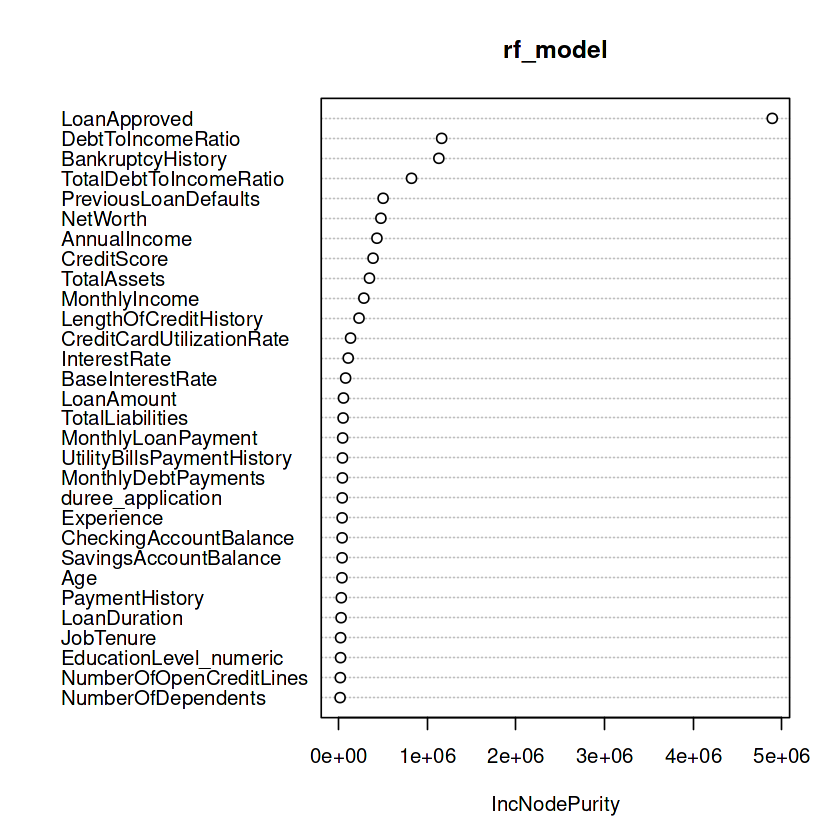

In [25]:
print(rf_model)
importance(rf_model)
varImpPlot(rf_model)


### Evaluation de modèle

In [39]:
# Calcul du R² (coefficient de détermination)

R2_score <- function(X, y_reel, model,predictions) {
  # Prédictions du modèle
 
  
  # Calcul de la somme des carrés des résidus
  ss_residual <- sum((y_reel - predictions)^2)
  
  # Calcul de la somme des carrés totaux
  ss_total <- sum((y_reel - mean(y_reel))^2)
  
  # Calcul du R²
  r2_score <- 1 - (ss_residual / ss_total)
  
  
  return(r2_score)
}



In [41]:
cat('pour partie entrainement:')
predictions_train <- predict(rf_model, newdata = X_train)
postResample(pred = predictions_train, obs = y_train)
# Calcul du R² pour les données d'entraînement
r2_score_train <- R2_score(X_train, y_train, rf_model,predictions_train)
cat("R²  :", r2_score_train, "\n")

# Calcul du R² pour les données de test
cat('pour partie test:')
predictions_test <- predict(rf_model, newdata = X_test)
postResample(pred = predictions_test, obs = y_test)
r2_score_test <- R2_score(X_test, y_test, rf_model, predictions_test)
cat("R² :", r2_score_test, "\n")

pour partie entrainement:

RMSE     Rsquared          MAE 
0.0173719309 0.9999950134 0.0004790392

R²  : 0.999995 
pour partie test:

RMSE    Rsquared         MAE 
0.032444865 0.999982581 0.001338028

R² : 0.9999826 
